# Setup

In [2]:
import gymnasium as gym
import babybot01_env
from tqdm import tqdm
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback, CallbackList
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from stable_baselines3.common.monitor import Monitor
import time


name = 'ppo_1_spidy_v4_1'
env_id = "Spidy-v4_1"
n_steps = 1200
n_envs = 1

policy = 'MlpPolicy'
tensorboard_log = f"./{name}/t_logs/"
path = f"./{name}/model/{name}"
log_path = f"./{name}/logs/"
device = 'cpu'

def make_env(render_mode:str=None):
    e = gym.make(env_id, render_mode=render_mode)
    return e

# Test Env

In [3]:


env = gym.make(env_id,max_episode_steps=n_steps, render_mode="human", debug_mode=True)
obs, info = env.reset()


while True:
    
    action = np.zeros(24)
    obs, rew, terminated, truncated, info = env.step(action)
    

env.close()

pybullet build time: Nov 28 2023 23:45:17


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Intel
GL_RENDERER=Mesa Intel(R) UHD Graphics 620 (KBL GT2)
GL_VERSION=4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Intel
Renderer = Mesa Intel(R) UHD Graphics 620 (KBL GT2)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubu

/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/hostEnv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/dorvan/Documents/dorvan/Babydoll/Produits/Babybot-01/Informatic-01/venv/ho

: 

# Create agent

In [ ]:
train_env = gym.make(env_id, render_mode="rgb_array", max_episode_steps=1000)

model = PPO(policy, train_env, batch_size = 60, verbose=0, n_steps=n_steps, tensorboard_log=tensorboard_log)

#model.save(path)

pybullet build time: Nov 28 2023 23:45:17


# Train

In [9]:
class InfoCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        # Access the training environment's 'step_info' attribute
        
        info = self.locals['infos']
        info = info[0]

        self.logger.record("rewards/distance_reward", info["distance_reward"])
        self.logger.record("rewards/last_ep_mean_rew", info["last_ep_mean_rew"])

        return True
            
train_env = Monitor(make_env())
eval_env = make_env()

eval_callback = EvalCallback(eval_env,
                             log_path=log_path, eval_freq=1e4,
                             deterministic=True, render=False)

class SaveOnStep(BaseCallback):
    def __init__(self, steps: int, path: str):
        super().__init__()
        self.steps = steps
        self.save_path = path

    def _on_step(self) -> bool:
        # Check if the current step matches the saving frequency
        if self.n_calls % self.steps == 0:
            # Save model with the current timestep in the filename

            print(f"Saving model at step {self.n_calls} to {self.save_path}")
            self.model.save(self.save_path)
        return True
    
callbacks = [SaveOnStep(1e5, path), InfoCallback(), eval_callback]

model = PPO.load(path,train_env ,device=device)

model.learn(total_timesteps=1e6, progress_bar=True, callback=callbacks, reset_num_timesteps=False)

model.save(path)

train_env.close()


Output()

Eval num_timesteps=121600, episode_reward=48.93 +/- 30.65

Episode length: 991.00 +/- 0.00

New best mean reward!

Eval num_timesteps=131600, episode_reward=67.58 +/- 21.90

Episode length: 991.00 +/- 0.00

New best mean reward!

Eval num_timesteps=141600, episode_reward=156.10 +/- 48.85

New best mean reward!

Eval num_timesteps=151600, episode_reward=71.83 +/- 16.62

Episode length: 991.00 +/- 0.00

Eval num_timesteps=161600, episode_reward=66.83 +/- 12.81

Episode length: 991.00 +/- 0.00

Eval num_timesteps=171600, episode_reward=35.15 +/- 21.18

Episode length: 991.00 +/- 0.00

Eval num_timesteps=181600, episode_reward=126.03 +/- 54.42

Episode length: 991.00 +/- 0.00

Eval num_timesteps=191600, episode_reward=141.68 +/- 158.34

Episode length: 991.00 +/- 0.00

Eval num_timesteps=201600, episode_reward=89.87 +/- 31.61

Episode length: 991.00 +/- 0.00

Saving model at step 100000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=211600, episode_reward=116.45 +/- 69.99

Episode length: 991.00 +/- 0.00

Eval num_timesteps=221600, episode_reward=107.83 +/- 42.57

Episode length: 991.00 +/- 0.00

Eval num_timesteps=231600, episode_reward=211.93 +/- 257.90

Episode length: 991.00 +/- 0.00

New best mean reward!

Eval num_timesteps=241600, episode_reward=52.63 +/- 23.89

Episode length: 991.00 +/- 0.00

Eval num_timesteps=251600, episode_reward=133.76 +/- 36.71

Episode length: 991.00 +/- 0.00

Eval num_timesteps=261600, episode_reward=87.59 +/- 60.42

Episode length: 991.00 +/- 0.00

Eval num_timesteps=271600, episode_reward=63.93 +/- 41.17

Episode length: 991.00 +/- 0.00

Eval num_timesteps=281600, episode_reward=115.67 +/- 53.57

Episode length: 991.00 +/- 0.00

Eval num_timesteps=291600, episode_reward=156.21 +/- 23.69

Episode length: 991.00 +/- 0.00

Eval num_timesteps=301600, episode_reward=175.41 +/- 101.58

Episode length: 991.00 +/- 0.00

Saving model at step 200000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=311600, episode_reward=189.09 +/- 16.27

Episode length: 991.00 +/- 0.00

Eval num_timesteps=321600, episode_reward=95.80 +/- 30.70

Episode length: 991.00 +/- 0.00

Eval num_timesteps=331600, episode_reward=223.69 +/- 123.51

Episode length: 991.00 +/- 0.00

New best mean reward!

Eval num_timesteps=341600, episode_reward=155.17 +/- 39.94

Eval num_timesteps=351600, episode_reward=84.32 +/- 41.50

Eval num_timesteps=361600, episode_reward=113.95 +/- 25.86

Episode length: 991.00 +/- 0.00

Eval num_timesteps=371600, episode_reward=137.06 +/- 72.49

Episode length: 991.00 +/- 0.00

Eval num_timesteps=381600, episode_reward=63.11 +/- 56.48

Episode length: 991.00 +/- 0.00

Eval num_timesteps=391600, episode_reward=105.63 +/- 48.37

Episode length: 991.00 +/- 0.00

Eval num_timesteps=401600, episode_reward=94.14 +/- 86.99

Episode length: 991.00 +/- 0.00

Saving model at step 300000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=411600, episode_reward=118.22 +/- 91.92

Episode length: 991.00 +/- 0.00

Eval num_timesteps=421600, episode_reward=90.52 +/- 25.76

Episode length: 991.00 +/- 0.00

Eval num_timesteps=431600, episode_reward=146.79 +/- 92.53

Episode length: 991.00 +/- 0.00

Eval num_timesteps=441600, episode_reward=243.53 +/- 70.84

Episode length: 991.00 +/- 0.00

New best mean reward!

Eval num_timesteps=451600, episode_reward=52.76 +/- 18.56

Episode length: 991.00 +/- 0.00

Eval num_timesteps=461600, episode_reward=155.20 +/- 57.19

Episode length: 991.00 +/- 0.00

Eval num_timesteps=471600, episode_reward=85.45 +/- 63.79

Episode length: 991.00 +/- 0.00

Eval num_timesteps=481600, episode_reward=68.46 +/- 10.03

Episode length: 991.00 +/- 0.00

Eval num_timesteps=491600, episode_reward=178.52 +/- 37.73

Episode length: 991.00 +/- 0.00

Eval num_timesteps=501600, episode_reward=87.63 +/- 24.55

Episode length: 991.00 +/- 0.00

Saving model at step 400000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=511600, episode_reward=56.73 +/- 21.48

Episode length: 991.00 +/- 0.00

Eval num_timesteps=521600, episode_reward=120.17 +/- 142.94

Episode length: 991.00 +/- 0.00

Eval num_timesteps=531600, episode_reward=137.49 +/- 67.85

Episode length: 991.00 +/- 0.00

Eval num_timesteps=541600, episode_reward=104.13 +/- 23.78

Episode length: 991.00 +/- 0.00

Eval num_timesteps=551600, episode_reward=147.83 +/- 35.53

Episode length: 991.00 +/- 0.00

Eval num_timesteps=561600, episode_reward=278.59 +/- 289.85

Episode length: 991.00 +/- 0.00

New best mean reward!

Eval num_timesteps=571600, episode_reward=51.86 +/- 12.21

Episode length: 991.00 +/- 0.00

Eval num_timesteps=581600, episode_reward=96.19 +/- 69.81

Episode length: 991.00 +/- 0.00

Eval num_timesteps=591600, episode_reward=151.58 +/- 65.73

Episode length: 991.00 +/- 0.00

Eval num_timesteps=601600, episode_reward=125.60 +/- 41.05

Episode length: 991.00 +/- 0.00

Saving model at step 500000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=611600, episode_reward=121.51 +/- 43.98

Episode length: 991.00 +/- 0.00

Eval num_timesteps=621600, episode_reward=149.28 +/- 46.35

Episode length: 991.00 +/- 0.00

Eval num_timesteps=631600, episode_reward=70.77 +/- 34.34

Episode length: 991.00 +/- 0.00

Eval num_timesteps=641600, episode_reward=93.15 +/- 31.60

Episode length: 991.00 +/- 0.00

Eval num_timesteps=651600, episode_reward=130.15 +/- 79.32

Episode length: 991.00 +/- 0.00

Eval num_timesteps=661600, episode_reward=108.20 +/- 49.12

Episode length: 991.00 +/- 0.00

Eval num_timesteps=671600, episode_reward=142.54 +/- 121.51

Episode length: 991.00 +/- 0.00

Eval num_timesteps=681600, episode_reward=68.37 +/- 30.40

Episode length: 991.00 +/- 0.00

Eval num_timesteps=691600, episode_reward=74.05 +/- 24.34

Episode length: 991.00 +/- 0.00

Eval num_timesteps=701600, episode_reward=84.14 +/- 60.31

Episode length: 991.00 +/- 0.00

Saving model at step 600000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=711600, episode_reward=132.39 +/- 72.42

Episode length: 991.00 +/- 0.00

Eval num_timesteps=721600, episode_reward=84.66 +/- 17.68

Episode length: 991.00 +/- 0.00

Eval num_timesteps=731600, episode_reward=95.29 +/- 47.16

Episode length: 991.00 +/- 0.00

Eval num_timesteps=741600, episode_reward=98.13 +/- 31.76

Episode length: 991.00 +/- 0.00

Eval num_timesteps=751600, episode_reward=124.24 +/- 93.01

Episode length: 991.00 +/- 0.00

Eval num_timesteps=761600, episode_reward=92.67 +/- 13.73

Episode length: 991.00 +/- 0.00

Eval num_timesteps=771600, episode_reward=100.44 +/- 28.91

Episode length: 991.00 +/- 0.00

Eval num_timesteps=781600, episode_reward=34.41 +/- 8.03

Episode length: 991.00 +/- 0.00

Eval num_timesteps=791600, episode_reward=62.40 +/- 37.63

Episode length: 991.00 +/- 0.00

Eval num_timesteps=801600, episode_reward=63.67 +/- 42.02

Episode length: 991.00 +/- 0.00

Saving model at step 700000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=811600, episode_reward=56.61 +/- 30.78

Episode length: 991.00 +/- 0.00

Eval num_timesteps=821600, episode_reward=110.13 +/- 55.80

Episode length: 991.00 +/- 0.00

Eval num_timesteps=831600, episode_reward=123.65 +/- 36.80

Episode length: 991.00 +/- 0.00

Eval num_timesteps=841600, episode_reward=40.18 +/- 14.89

Episode length: 991.00 +/- 0.00

Eval num_timesteps=851600, episode_reward=65.00 +/- 11.22

Episode length: 991.00 +/- 0.00

Eval num_timesteps=861600, episode_reward=211.99 +/- 82.16

Episode length: 991.00 +/- 0.00

Eval num_timesteps=871600, episode_reward=84.07 +/- 10.60

Episode length: 991.00 +/- 0.00

Eval num_timesteps=881600, episode_reward=48.13 +/- 21.02

Episode length: 991.00 +/- 0.00

Eval num_timesteps=891600, episode_reward=44.33 +/- 30.73

Episode length: 991.00 +/- 0.00

Eval num_timesteps=901600, episode_reward=29.96 +/- 14.26

Episode length: 991.00 +/- 0.00

Saving model at step 800000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=911600, episode_reward=94.42 +/- 39.26

Episode length: 991.00 +/- 0.00

Eval num_timesteps=921600, episode_reward=60.97 +/- 51.91

Episode length: 991.00 +/- 0.00

Eval num_timesteps=931600, episode_reward=94.18 +/- 26.82

Episode length: 991.00 +/- 0.00

Eval num_timesteps=941600, episode_reward=86.33 +/- 14.77

Episode length: 991.00 +/- 0.00

Eval num_timesteps=951600, episode_reward=170.81 +/- 67.63

Episode length: 991.00 +/- 0.00

Eval num_timesteps=961600, episode_reward=129.90 +/- 41.81

Episode length: 991.00 +/- 0.00

Eval num_timesteps=971600, episode_reward=80.05 +/- 29.51

Episode length: 991.00 +/- 0.00

Eval num_timesteps=981600, episode_reward=80.45 +/- 16.04

Episode length: 991.00 +/- 0.00

Eval num_timesteps=991600, episode_reward=118.38 +/- 36.96

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1001600, episode_reward=151.86 +/- 96.48

Episode length: 991.00 +/- 0.00

Saving model at step 900000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=1011600, episode_reward=136.37 +/- 79.55

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1021600, episode_reward=64.27 +/- 46.79

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1031600, episode_reward=138.12 +/- 36.82

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1041600, episode_reward=134.35 +/- 83.13

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1051600, episode_reward=100.20 +/- 42.50

Eval num_timesteps=1061600, episode_reward=80.84 +/- 16.98

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1071600, episode_reward=67.09 +/- 14.50

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1081600, episode_reward=77.47 +/- 35.02

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1091600, episode_reward=136.86 +/- 56.86

Episode length: 991.00 +/- 0.00

Eval num_timesteps=1101600, episode_reward=128.66 +/- 45.38

Episode length: 991.00 +/- 0.00

Saving model at step 1000000 to ./ppo_spidy_v4_1/model/ppo_spidy_v4_1

Eval num_timesteps=1111600, episode_reward=221.75 +/- 62.86

Episode length: 991.00 +/- 0.00

# Display

In [10]:

test_env = gym.make(env_id,max_episode_steps=n_steps, render_mode="human", )
model = PPO.load(path)
info = {}

for episode in range(1):

    done = False
    obs, info = test_env.reset()
    for t in range(n_steps):

        action = model.predict(obs)[0]
        #action = np.zeros(66)
        
        obs, reward, terminate, trunc, info = test_env.step(action)
    
        if terminate or trunc:
            break

        print(reward)

test_env.close()




startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Intel
GL_RENDERER=Mesa Intel(R) UHD Graphics 620 (KBL GT2)
GL_VERSION=4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 23.2.1-1ubuntu3.1~22.04.2
Vendor = Intel
Renderer = Mesa Intel(R) UHD Graphics 620 (KBL GT2)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubu

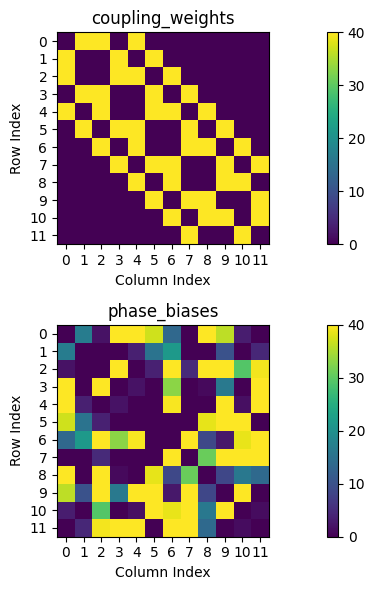

In [11]:
# Show CPG parameters
coupling_weights = info['coupling_weights']
phase_biases= info['phase_biases']



fig, axs = plt.subplots(2,1, figsize=(12, 6))  # Adjust size if needed

im1 = axs[0].imshow(coupling_weights, cmap='viridis', aspect='equal')
fig.colorbar(im1, ax=axs[0], orientation='vertical')  # Add a color bar for reference
axs[0].set_title("coupling_weights")
axs[0].set_xlabel("Column Index")
axs[0].set_ylabel("Row Index")
axs[0].set_xticks(range(12))
axs[0].set_yticks(range(12))

im2 = axs[1].imshow(phase_biases, cmap='viridis', aspect='equal')
fig.colorbar(im1, ax=axs[1], orientation='vertical')  # Add a color bar for reference
axs[1].set_title("phase_biases")
axs[1].set_xlabel("Column Index")
axs[1].set_ylabel("Row Index")
axs[1].set_xticks(range(12))
axs[1].set_yticks(range(12))


plt.tight_layout()
plt.show()